In [1]:
%matplotlib  inline

In [2]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
regres_data =  pd.read_csv('valeurspropres.csv')
regres_data.info()
print(regres_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017154 entries, 0 to 1017153
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1017154 non-null  int64  
 1   Valeur fonciere  1017154 non-null  float64
 2   Code postal      1017154 non-null  int64  
 3   Type local       1017154 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.0+ MB
   Unnamed: 0  Valeur fonciere  Code postal  \
0           0          84000.0         1960   
1           1          84000.0         1960   
2           2         210000.0         1250   
3           3         210000.0         1250   
4           4          36000.0         1560   
5           5         600000.0         1000   
6           6         600000.0         1000   
7           7         600000.0         1000   
8           8          84920.0         1500   
9           9          84920.0         1500   

                   

Text(0, 0.5, 'frequence')

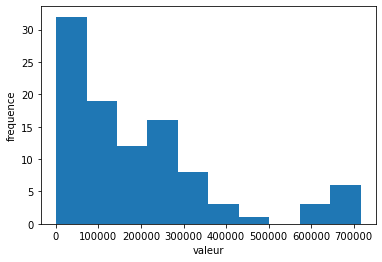

In [4]:
plt.hist(regres_data['Valeur fonciere'][:100], bins= 10)
plt.xlabel('valeur')
plt.ylabel('frequence')

In [5]:
X = regres_data['Valeur fonciere'][:100].to_numpy()
print(X.shape)
X = X.reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(X)
scaler
# z = (x - moyenne) / standard deviation

(100,)


StandardScaler()

In [6]:
print(scaler.mean_, scaler.scale_)

[197490.376] [191814.4709073]


In [7]:
X_scaled = scaler.transform(X)

Text(0, 0.5, 'frequence')

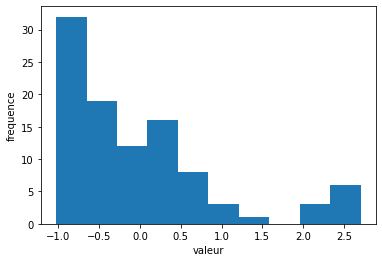

In [8]:
plt.hist(X_scaled)
plt.xlabel('valeur')
plt.ylabel('frequence')

In [9]:
X_scaled.mean()

-1.1990408665951691e-16

In [10]:
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min

Text(0, 0.5, 'frequence')

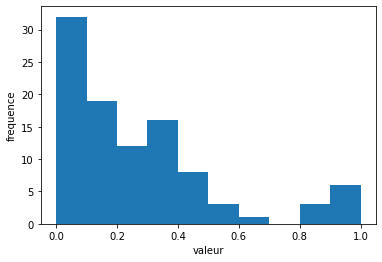

In [11]:
plt.hist(X_scaled)
plt.xlabel('valeur')
plt.ylabel('frequence')

In [12]:
scaler = preprocessing.PowerTransformer().fit(X)
X_scaled = scaler.transform(X)

Text(0, 0.5, 'frequence')

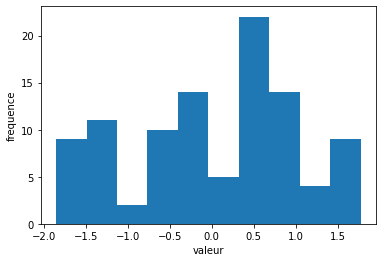

In [13]:
plt.hist(X_scaled)
plt.xlabel('valeur')
plt.ylabel('frequence')

In [14]:
scaler = preprocessing.QuantileTransformer(n_quantiles=5, output_distribution='normal').fit(X)
X_scaled = scaler.transform(X)


Text(0, 0.5, 'frequence')

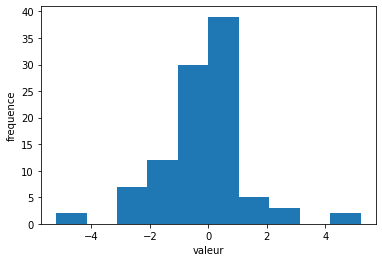

In [15]:
plt.hist(X_scaled)
plt.xlabel('valeur')
plt.ylabel('frequence')

In [16]:
scaler = preprocessing.Normalizer().fit(X) # Attention aux traductions
X_scaled = scaler.transform(X)


Text(0, 0.5, 'frequence')

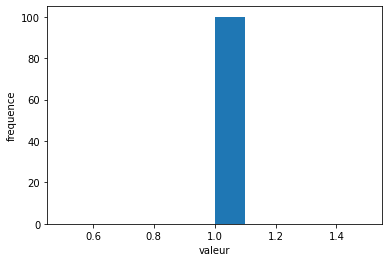

In [17]:
plt.hist(X_scaled)
plt.xlabel('valeur')
plt.ylabel('frequence')

In [18]:
X_scaled[:30]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### Important:  les données de test devront etre transformées avec les paramètres utilisés pour les données d'apprentissage.
### Même remarque pour les prédictions
### Il n'est pas toujours necessaire de transformer les 'y'

### Il est possible d'enchainer les tranformations par des pipelines sklearn